__[Do not edit the contents of this cell]__

# MSc in Bioinformatics and Theoretical Systems Biology - Maths and Stats Assignment 2017/18

This assignment is to be completed in ```Julia``` and returned as a ```Jupyter``` notebook. There are 4 types of cells used in this notebook:
1. Cells containing tasks and instructions to be completed. Do not edit these.
2. Cells in which you are meant to provide an answer in ```Markdown``` format.
3. Cells containing code that defines e.g. which packages to load, but can also contain routines and snippets of codes that you should use.
4. Cells that contain the ```Julia``` code that __you__ write to solve the problems set. 

Each of these cells will contain explit comments at the top telling you whether to edit or not edit a cell. In Code cells comments are specified by the "#" character. In the Markdown Answer Cells, replace the ```xxx``` by your answer, whenever these are present. You will have to execute all code and Markdown cells in order to (i) make use of the provided code, and (ii) format the markdown appropriately.

There are four problems to be tackled:

1. Analysis of Single Cell Data [40%]
2. Multiple Testing Problems [20%]
3. A Model of Gene Expression  [15%]
4. A Prion Replication Model [25%]

For each questions there will be two or more parts of increasing difficultiness. Further reading will, where appropriate, be given at the start of each question.


You will have to make sure that the following packages are installed on your machine: 
- ```DataFrames```
- ```Plots```
- ```StatPlots```
- ```GR```
- ```Distributions```
- ```DifferentialEquations```


In [8]:
# [Do not edit the contents of this cell]
using DataFrames, Plots, StatPlots, Distributions, DifferentialEquations
gr();

__[Do not edit the contents of this cell]__

## Problem 1: Single Cell Analysis

We take a subset of the data of Psaila _et al._ (Genome Biology, __17__:83 (2016)). You will

1. How many genes and how many cells are in the data-set? [4]
2. Produce a ViolinPlot of the gene expression data, with at most 6 rows. [10pt]
3. The entries of the DataFrame are measured in cycles. The relationship between cycles and gene expression values is 
$$C_t = -\log_2(m)$$
Write a function that transforms $C_t$ into gene expression levels $m$. [6]  
4. Calculate the correlation matrix of the gene expression levels for all possible pairs of genes. [10pt]
5. Make a dataframe that has the following three columns: Gene1, Gene2, Correlation Coefficient.[10pt]

In [9]:
# [Do not edit the contents of this cell]

# These commands produce a DataFrame in which you have three columns "variable", "value" and "GeneID".
# Here variable corresponds to the cell.
pexp= readtable("Pexpr.csv");
spexp=stack(pexp,names(pexp)[2:end]);

### Part 1

How many genes and how many cells are in the data-set?

In [10]:
# [Write your code in this cell]
NUBR_COL_HEADER=1
size(unique(spexp[:GeneID]))[1],size(pexp)[2]-NUBR_COL_HEADER


(59,285)

__[Provide your answer here]__

- The number of genes in the dataset is: 59
- The number of cells in the dataset is: 285

__[Do not edit the contents of this cell]__

### Part 2
Now Produce a ViolinPlot of the gene expression data, with at most 5 rows.
Start e.g. with ```plot(violin(spexp,:GeneID,:value))```

Hint: use ```unames=sort(unique(spexp[:GeneID]));``` 
you can then plot e.g. the first 5 genes via

```violin(spexp[findin(spexp[:GeneID],unames[1:5]),:],:GeneID,:value)```

 and use the ```layout``` function to arrange the overall plot

The ```Plots``` package has excellent documentation which you will find helpful.


In [12]:
# [Write your code in this cell]
# 

unames=sort(unique(spexp[:GeneID]))
gr(size=(1500,1200)) 
Plots.plot(violin(spexp[findin(spexp[:GeneID],unames[1:15]),:],:GeneID,:value),
violin(spexp[findin(spexp[:GeneID],unames[16:30]),:],:GeneID,:value),
violin(spexp[findin(spexp[:GeneID],unames[31:45]),:],:GeneID,:value),
violin(spexp[findin(spexp[:GeneID],unames[46:59]),:],:GeneID,:value),layout=(4,1),label="Gene expression")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 ANK1 
 
 
 B2M 
 
 
 CD105/ENG 
 
 
 CD110/MPL 
 
 
 CD117/KIT 
 
 
 CD123/IL3RA 
 
 
 CD34 
 
 
 CD36 
 
 
 CD38 
 
 
 CD41/ITGA2B 
 
 
 CD42/GP1BA 
 
 
 CD44 
 
 
 CD47 
 
 
 CD71/TFRC 
 
 
 CD9 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 30 
 
 
 35 
 
 
 GeneID 
 
 
 value 
 
<polygon clip-path="url(#clip6502)" points="
95.4358,236.585 96.1304,234.25 96.7502,231.915 97.2855,229.581 97.7281,227.246 98.0711,224.911 98.3092,222.577 98.4389,220.242 98.4585,217.907 98.3682,215.573 
 98.17,213.238 97.8679,210.903 97.4675,208.569 96.9757,206.234 96.4009,203.899 95.7528,201.565 95.0415,199.23 94.278,196.895 93.4734,194.561 92.6389,192.226 
 91.7853,189.891 90.9233,187.557 90.0625,185.222 89.2121,182.887 88.3801,180.553 87.5735,178.218 86.7983,175.883 86.0591,173.549 85.3598,171.214 84.7029,168.88 
 84.0901,166.545 83.5222,164.21 82.9991,161.876 82.5201,159.541 82.0837,157.206 81.6883,154.872 81.3316,152.537 81.0113,150.202 80.7248,147.868 80.4694,145.533 
 80.2425,143.198 80.0416,140.864 79.8641,138.529 79.7078,136.194 79.5705,133.86 79.4502,131.525 79.3453,129.19 79.2542,126.856 79.1757,124.521 79.1087,122.186 
 79.0523,119.852 79.0062,117.517 78.9699,115.182 78.9435,112.848 78.9272,110.513 78.9216,108.178 78.9278,105.844 78.947,103.509 78.981,101.174 79.0319,98.8397 
 79.1026,96.505 79.1961,94.1704 79.3163,91.8357 79.4676,89.5011 79.6548,87.1664 79.8835,84.8317 80.1597,82.4971 80.49,80.1624 80.8813,77.8278 81.341,75.4931 
 81.8764,73.1584 82.4949,70.8238 83.2036,68.4891 84.0091,66.1545 84.9172,63.8198 85.9326,61.4851 87.0587,59.1505 88.297,56.8158 89.6469,54.4812 91.1057,52.1465 
 92.668,49.8118 94.3254,47.4772 96.067,45.1425 97.8785,42.8078 99.7429,40.4732 101.641,38.1385 103.549,35.8039 105.444,33.4692 107.299,31.1345 109.088,28.7999 
 110.781,26.4652 112.353,24.1306 113.777,21.7959 115.027,19.4612 116.082,17.1266 116.921,14.7919 117.53,12.4573 117.897,10.1226 39.3701,10.1226 39.7371,12.4573 
 40.3463,14.7919 41.1859,17.1266 42.2405,19.4612 43.4907,21.7959 44.9142,24.1306 46.4861,26.4652 48.1799,28.7999 49.9684,31.1345 51.8236,33.4692 53.7185,35.8039 
 55.627,38.1385 57.5246,40.4732 59.389,42.8078 61.2005,45.1425 62.9421,47.4772 64.5995,49.8118 66.1618,52.1465 67.6206,54.4812 68.9705,56.8158 70.2088,59.1505 
 71.3349,61.4851 72.3503,63.8198 73.2584,66.1545 74.0639,68.4891 74.7726,70.8238 75.3911,73.1584 75.9265,75.4931 76.3862,77.8278 76.7775,80.1624 77.1078,82.4971 
 77.384,84.8317 77.6127,87.1664 77.7999,89.5011 77.9512,91.8357 78.0714,94.1704 78.1649,96.505 78.2356,98.8397 78.2865,101.174 78.3205,103.509 78.3397,105.844 
 78.3459,108.178 78.3403,110.513 78.3241,112.848 78.2976,115.182 78.2613,117.517 78.2152,119.852 78.1588,122.186 78.0918,124.521 78.0133,126.856 77.9222,129.19 
 77.8173,131.525 77.697,133.86 77.5597,136.194 77.4034,138.529 77.2259,140.864 77.025,143.198 76.7981,145.533 76.5427,147.868 76.2562,150.202 75.9359,152.537 
 75.5792,154.872 75.1838,157.206 74.7474,159.541 74.2684,161.876 73.7453,164.21 73.1774,166.545 72.5646,168.88 71.9077,171.214 71.2084,173.549 70.4692,175.883 
 69.694,178.218 68.8874,180.553 68.0554,182.887 67.205,185.222 66.3442,187.557 65.4822,189.891 64.6286,192.226 63.7941,194.561 62.9895,196.895 62.226,199.23 
 61.5147,201.565 60.8666,203.899 60.2919,206.234 59.8001,208.569 59.3996,210.903 59.0975,213.238 58.8993,215.573 58.809,217.907 58.8286,220.242 58.9583,222.577 
 59.1964,224.911 59.5394,227.246 59.982,229.581 60.5173,231.915 61.1371,234.25 61.8317,236.585 95.4358,236.585 
 " fill="#009af9" fill-opacity="1"/>
<polyline clip-path="url(#clip6502)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 95.4358,236.585 96.1304,234.25 96.7502,231.915 97.2855,229.581 97.7281,227.246 98.0711,224.911 98.3092,222.577 98.4389,220.242 98.4585,217.907 98.3682,215.573 
 98.17,213.238 97.8679,210.903 97.4675,208.

__[Do not edit the contents of this cell]__

### Part 3
Now write a function that returns the amount of gene expression given the $C_t$ value as input.

Calculate the expression values corresponding to $C_t=\{1,10,20,30,40\}$.


In [13]:
# [Write your code in this cell]

#Ct=−log2(m)
function cal_m(x)
    result =[]
    for i in x 
        push!(result,(2.0^(-i)))
    end
    return result
end

a=[1,10,20,30,40]
cal_m(a)

    


5-element Array{Any,1}:
 0.5        
 0.000976563
 9.53674e-7 
 9.31323e-10
 9.09495e-13

__[Provide your answer here]__

Replace the ```xxx``` by the gene epxression values:

$C_t=1 $: 0.5

$C_t=10 $: 0.0009765625

$C_t=20 $: 9.5367431640625e-7

$C_t=30 $: 9.313225746154785e-10

$C_t=40 $: 9.094947017729282e-13

__[Do not edit the contents of this cell]__

### Part 4
Calculate the correlation matrix of the gene expression levels for all possible pairs of genes.
For this we define a new dataframe ```qexp```, where the columns correspond to the genes.

In [14]:
# [Do not edit the contents of this cell]
qexp=unstack(spexp,:variable,:GeneID,:value)
delete!(qexp,:variable)
qexp

,ANK1,B2M,CD105/ENG,CD110/MPL,CD117/KIT,CD123/IL3RA,CD34,CD36,CD38,CD41/ITGA2B,CD42/GP1BA,CD44,CD47,CD71/TFRC,CD9,CDK4,CDK6,CLU,CNRIP1,CTNNB1,CXCR4,DDB1,DHRS3,EIF4EBP1,ETS1,FHL1,FLI1,FOG1/ZFPM1,FOXO3,GABPA,GAPDH,GATA1,GATA2,GFI1B,HIF1A,HPRT1,JAK2,KLF1,LEF1,LOX,LSD1/KDM1A,MCL1,MEIS1,MYB,P27KIP1/CDKN1B,PFKP,PIM1,RGS18,RUNX1,SDPR,SELP,SPI1,SRD5A3,TAL1,TGFB1,TMEM180/MFSD13A,TMOD1,TUBB2A,VWF
1,40.0,15.12502475,20.63015589,20.51099224,40.0,40.0,19.78558465,40.0,40.0,14.9286176,15.65518996,40.0,40.0,18.72593553,40.0,19.77711906,21.12091368,15.99665079,40.0,18.08822101,19.91218993,21.24903929,40.0,16.41673603,40.0,22.2334323,21.92260564,22.49240017,40.0,20.73953547,15.99454844,17.5096548,40.0,17.86855193,17.48934029,18.78729625,20.84748218,21.81166702,40.0,22.15386064,17.92842425,19.11231324,20.46069225,19.13243026,22.28619814,40.0,23.8914768,16.20034478,17.87858301,40.0,40.0,40.0,23.21957503,20.42830673,14.04451984,20.86550018,40.0,40.0,16.59271988
2,40.0,21.62805298,40.0,40.0,25.9670656,40.0,26.19516985,40.0,40.0,40.0,40.0,24.99252515,40.0,26.32124174,40.0,40.0,25.98154311,24.33963859,40.0,25.2607686,40.0,40.0,40.0,40.0,24.46059418,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,26.23260605,26.98624765,25.27795761,40.0,25.77457895,40.0,40.0,40.0,40.0,40.0,40.0,31.37539152,40.0,40.0,40.0,23.4855091,40.0,40.0,40.0,40.0
3,40.0,22.30952477,40.0,40.0,40.0,40.0,24.56829895,40.0,40.0,40.0,25.59038854,25.11222716,40.0,40.0,40.0,40.0,27.00412211,40.0,40.0,40.0,40.0,26.89962522,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,23.26078757,40.0,40.0,27.03343373,24.73146285,40.0,25.86785069,40.0,40.0,40.0,26.79796884,40.0,40.0,40.0,40.0,40.0,40.0,40.0,26.69178081,40.0,40.0,40.0,40.0,40.0,32.75653317,40.0,40.0,40.0,40.0
4,40.0,16.25490508,40.0,22.71506364,20.5570567,40.0,20.54399367,40.0,22.80055667,40.0,40.0,16.9338307,40.0,20.06924757,22.2665784,24.21212015,20.47140874,21.45466824,40.0,21.32706486,40.0,40.0,40.0,19.27818666,20.81712995,40.0,25.51684955,40.0,40.0,22.94305243,18.22920404,20.98293657,20.16852026,40.0,19.7983994,22.37944328,40.0,40.0,40.0,40.0,20.03335952,21.6660522,40.0,18.51161655,40.0,40.0,40.0,40.0,20.09097887,40.0,19.9679916,22.2134697,23.13755232,40.0,17.21810775,40.0,40.0,40.0,40.0
5,40.0,12.69693841,17.03543637,40.0,40.0,19.72053104,15.95959001,40.0,40.0,40.0,18.68424657,13.39101273,40.0,18.00815872,40.0,17.91544609,16.25705434,18.62215928,40.0,15.67562716,40.0,17.45773606,40.0,17.21838461,14.87018354,16.85614575,16.43771633,40.0,19.17680546,18.43849415,14.38727005,40.0,17.79152135,15.68515429,40.0,18.88937619,18.55506659,40.0,40.0,40.0,16.28452553,17.44673305,17.99442334,14.95359949,17.36335532,40.0,40.0,40.0,15.83819263,17.81012795,40.0,40.0,40.0,17.8314097,13.39198009,40.0,40.0,18.50502147,40.0
6,40.0,11.49885156,40.0,19.68597489,17.05208713,40.0,16.19962017,40.0,40.0,40.0,19.03551785,14.88754448,17.86784951,17.05909602,40.0,40.0,15.18823626,16.69073581,40.0,17.34555654,18.61563953,18.82856172,40.0,40.0,16.40326724,17.4112152,16.61886339,17.09495946,19.30396394,18.13296695,40.0,40.0,18.2790868,40.0,15.39557253,17.74400125,18.7788752,40.0,40.0,40.0,16.97418541,15.44880851,18.62654405,14.85077138,21.20451579,40.0,40.0,15.28123806,17.36477973,17.83070421,15.58000039,40.0,17.75281876,40.0,14.28624259,17.66765241,40.0,40.0,16.45014525
7,40.0,12.34342318,18.25934126,40.0,16.94739392,19.78820264,15.56896243,40.0,20.10805618,40.0,17.89607561,13.36170389,40.0,40.0,16.2589415,18.26918523,15.56809316,20.01013126,40.0,18.22792492,15.83810748,19.96705124,40.0,17.54165597,13.50733409,15.65793119,15.66953748,40.0,19.8437093,18.08069752,13.05284598,40.0,16.22365742,16.99555991,14.51021623,18.08958503,18.34713972,40.0,40.0,16.13955784,15.99124665,17.31702915,40.0,14.12735287,17.14889273,40.0,40.0,40.0,15.03096749,40.0,16.47876344,40.0,17.9858569,16.75312713,14.11695999,40.0,40.0,40.0,17.87270697
8,40.0,13.08705056,16.06918277,40.0,17.07985598,40.0,17.97936017,40.0,40.0,19.55062474,18.00846369,14.67462403,40.0,40.0,18.9650899

In [15]:
# [Write your code in this cell]



#we know corr[i][j]=corr[j][i]
corr =zeros(Float64, 59, 59)
for i in 1:59
    for j in i:59
        corr[i,j]=cor(cal_m(qexp[i]),cal_m(qexp[j]))
    end
end
corr


59×59 Array{Float64,2}:
 1.0  0.549434  0.611992  -0.071829    …   0.196753     -0.0458148 
 0.0  1.0       0.540887   0.187956        0.106336      0.0324837 
 0.0  0.0       1.0       -0.00186772      0.236738      0.0986365 
 0.0  0.0       0.0        1.0            -0.0881824     0.47158   
 0.0  0.0       0.0        0.0             0.12852      -0.0698157 
 0.0  0.0       0.0        0.0         …  -0.0451647     0.128592  
 0.0  0.0       0.0        0.0            -0.0313707     0.0340767 
 0.0  0.0       0.0        0.0             0.113754     -0.071752  
 0.0  0.0       0.0        0.0             0.174082     -0.0966343 
 0.0  0.0       0.0        0.0             0.0999279     0.363168  
 0.0  0.0       0.0        0.0         …  -0.037206      0.607914  
 0.0  0.0       0.0        0.0             0.000951438   0.0455075 
 0.0  0.0       0.0        0.0             0.130083     -0.0892947 
 ⋮                                     ⋱                           
 0.0  0.0       0.0     

__[Do not edit the contents of this cell]__

### Part 5

 Make a dataframe that has the following three columns: Gene1, Gene2, and Correlation Coefficient. Only include those pairs of genes that have a correlation coefficient $|C|\ge 0.5$ Assume that these form a network. How many nodes and edges does this _relevance network_ have? Exclude self-interactions and remember that the network is undirected.

In [16]:
# [Write your code in this cell]
# 
winnerpairs = DataFrame(Gene1=[],Gene2=[],CorrelationCoefficient=[])

for counter1 in 1:size(unames)[1]
    for counter2 in counter1+1:size(unames)[1]
        #print(counter1,counter2,unames[counter2],'\n')
        corr_coef= corr[counter1,counter2]
        if(abs(corr_coef)>=0.5)
            genepair = DataFrame(Gene1 = [unames[counter1]], Gene2 = [unames[counter2]], CorrelationCoefficient=corr[counter1,counter2]);
            winnerpairs = [winnerpairs;genepair]
        end
    end
end
#fist con then unque
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!DO IT
print(size(unique(vcat(winnerpairs[1],winnerpairs[2])))[1])
print(",")
print(size(winnerpairs)[1])
winnerpairs


40,173

,Gene1,Gene2,CorrelationCoefficient
1,ANK1,B2M,0.5494342393873417
2,ANK1,CD105/ENG,0.6119917190609703
3,ANK1,CD117/KIT,0.6030056719613646
4,ANK1,CD41/ITGA2B,0.5657911918651338
5,ANK1,CD71/TFRC,0.7088222984044474
6,ANK1,CDK4,0.6659300574466898
7,ANK1,CNRIP1,0.748877995746452
8,ANK1,DDB1,0.6623269712693154
9,ANK1,EIF4EBP1,0.5612296134385993
10,ANK1,GATA1,0.6941883207134807


### __[Provide your answer here]__

- The number of nodes in the network is: 40
- The number of edges in the network is: 173

__[Do not edit the contents of this cell]__

## Problem 2: Multiple Testing

We have performed 100 hypothesis tests and obtained a vector ```pvals``` with 100 entries. Classical hypothesis testing suggests that 23 of the results are statistically significant. 

1. Write a function which applies a Bonferroni correction and which returns a Boolean vector where ```True``` indicates that the result is significant after correction, and ```False``` indicates that the statistical test is not significant. How many significant results remain in your sample? [10]
2. Write a function which applies a Benjamini-Hochberg correction and which returns a Boolean vector where ```True``` indicates that the result is significant after correction, and ```False``` indicates that the statistical test is not significant. How many significant results remain in your sample? [10]

The data are given here:


In [239]:
# [Do not edit the contents of this cell]

pvals=[0.841158,0.316054,0.272651,0.000041,0.001158,0.337214,0.881074,0.573758,0.002847,0.012367,0.000266,0.631194,0.897952,0.658293,0.00736778,0.006501,0.0000053,0.0534511,0.001051,0.0401066,0.0410704,0.292249,0.0001066,0.00120691,0.692511,0.931572,0.755266,0.00064639,0.637086,0.516961,0.679298,0.0349612,0.705074,0.000094,0.00001704,0.002118,0.052118,0.37621,0.0336165,0.467268,0.102244,0.354464,0.455951,0.352118,0.435666,0.631194,0.000009,0.692511,0.922032,0.612605,0.0006023831,0.0469081,0.586051,0.520999,0.981634,0.272651,0.77653,0.612605,0.00072745,0.0388417,0.658293,0.316054,0.592128,0.0388417,0.016574,0.067268,0.506574,0.023831,0.02653,0.881074,0.0534511,0.349689,0.00027681,0.793794,0.0349612,0.02246,0.605637,0.573758,0.0809034,0.0144105,0.92246,0.292249,0.34174,0.0005511,0.337214,0.37621,0.000388417,0.000648675,0.0320691,0.793794,0.477101,0.209457,0.000240474,0.000952,0.076501,0.003758,0.012367,0.009457,0.881074,0.00105045]
 

0.003758
0.006501

__[Do not edit the contents of this cell]__

### Part 1

Write a function which applies a Bonferroni correction and which returns a Boolean vector where ```True``` indicates that the result is significant after correction, and ```False``` indicates that the statistical test is not significant. How many significant results remain in your sample?

In the _Bonferroni_ correction we only accept those tests as rejecting the null model where the $p$-value is less than $0.05/n$, where $0.05$ is the conventional threshold for a single test (other thresholds may be set), and $n$ is the total number of tests. 

In [240]:
# [Write your code in this cell]
# 

pBonferroni = function(pvalvec)
    #print(sort(pvals)[23],"\n",sort(pvals)[24]) is: 0.003758 and 0.006501 therefore alpha 0.005
    alpha=0.005
    n=100
    bonfcutoff=alpha/n
    result=[]
    for i in 1:length(pvalvec)
        if pvalvec[i]<bonfcutoff
            push!(result, true)
        else
            push!(result, false)
        end
    end
   return result
end
   


hits=(pBonferroni(pvals))

print(sum(hits))



4

__[Provide your answer here]__

- The number of statistcially significant results after the Bonferroni correction is: 4


__[Do not edit the contents of this cell]__

### Part 2

Write a function which applies a Benjamini-Hochberg correction and which returns a Boolean vector where ```True``` indicates that the result is significant after correction, and ```False``` indicates that the statistical test is not significant. How many significant results remain in your sample?

The Bonferroni correction is often found to unnecessarily conservative; the _Benjamini-Hochberg_ correction aims to control the _False Discovery Rate_ (FDR) at a specific level, $q$. To do so we order the $p$-values such that $p_1\le p_2\le \ldots \le p_n$. 

For the desired FDR, $q$, we then find the value of $k$ such that $p_k\le \frac{k}{n}q$. For these tests we reject the null hypothesis.


In [19]:
# [Write your code in this cell]
# 
pBenjHoch = function(pvalvec,q=0.05)
psorted=sort(pvalvec)
n=100
cutoff=0
for k in 1:length(psorted)
    if(psorted[k]> k*q/n)
        cutoff=k-1
        break
    end
end
cutoffP=psorted[cutoff]
result=[]
for i in 1:length(pvalvec)
        if(pvalvec[i]<=cutoffP)
            push!(result, true)
        else
            push!(result, false)
        end            
end
return result
end

hits2=pBenjHoch(pvals)
sum(hits2)


29

__[Provide your answer here]__

- The number of statistcially significant results after the Benjamini-Hochberg correction is: 29


__[Do not edit the contents of this cell]__


## Problem 3:  A Model of Gene Expression 

We consider the case where mRNA, $m(t)$, changes according to the simple differential equation,

$$
  \frac{dm(t)}{dt} = \alpha +f(t) -\beta m(t),
$$

and the corresponding protein abundance, $p(t)$, follows

$$
    \frac{dp(t)}{dt}=\gamma m(t) - \delta p(t).
    $$

The function $f(t)$ described the behaviour of a transcription factor. $\alpha$ is the basal expression rate, $\gamma$ the rate of translation into protein, and $\beta$ and $\delta$ are the degradation rates for mRNA and protein, respectively.
    

For simplicity we use $[\alpha,\beta,\gamma,\delta]=[0.1,1,0.3,0.1]$. We always assume initial conditions $(m,p)=(0,0)$.

Here you need to
1. implement a function that implements the ODEs describing the mRNA and protein levels. [6]
2. solve the ODE for $f(t)=0$ and plot the results for $0\le t\le 20$.  [4]
3. solve the ODE for $f(t)=\sin(t/2\pi)$ and plot the results for $0\le t\le 20$.  [5]
  
Use ```DifferentialEquations.jl``` to solve the ODE.

__[Do not edit the contents of this cell]__

### Part 1
Implement a function that implements the ODEs describing the mRNA and protein levels. You should use this function as the basis for the functions in **Parts 1** and **2**.

In [21]:
# [Write your code in this cell]

function lisls(t,u,du)
    du[1]=0.1+f(t)-u[1]
    du[2]=0.3*u[1]-0.1*u[2]  
end

u0=[0.0,0.0]
tspan = (0.0,20.0);


__[Do not edit the contents of this cell]__


### Part 2
Solve the ODE for $f(t)=0$ and plot the results for $0\le t\le 20$. You can write a new function where you specify this explicitly.

In [23]:
# [Write your code in this cell]

f(t)=0.0
prob = ODEProblem(lisls,u0,tspan)
sol = solve(prob)
Plots.plot(sol,title = "Solution to the linear ODE", xaxis="Time (t)",yaxis="u(t)",label=["mRNA","Protein"]) 
#plot!(sol[2,:],linewidth=3,label="Protein")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 0.00 
 
 
 0.05 
 
 
 0.10 
 
 
 0.15 
 
 
 0.20 
 
 
 0.25 
 
 
 Solution to the linear ODE 
 
 
 Time (t) 
 
 
 u(t) 
 
<polyline clip-path="url(#clip6602)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 39.3701,1168.5 46.0037,1128.76 52.6373,1092.49 59.2708,1059.38 65.9044,1029.16 72.538,1001.58 79.1716,976.409 85.8052,953.433 92.4388,932.462 99.0724,913.321 
 105.706,895.851 112.34,879.906 118.973,865.352 125.607,852.068 132.24,839.944 138.874,828.879 145.507,818.778 152.141,809.559 158.775,801.145 165.408,793.466 
 172.042,786.457 178.675,780.059 185.309,774.219 191.943,768.889 198.576,764.024 205.21,759.585 211.843,755.534 218.477,751.836 225.111,748.459 231.744,745.377 
 238.378,742.563 245.011,739.996 251.645,737.654 258.279,735.517 264.912,733.567 271.546,731.786 278.179,730.159 284.813,728.673 291.446,727.318 298.08,726.081 
 304.714,724.953 311.347,723.924 317.981,722.985 324.614,722.129 331.248,721.347 337.882,720.631 344.515,719.978 351.149,719.381 357.782,718.836 364.416,718.339 
 371.05,717.887 377.683,717.474 384.317,717.099 390.95,716.756 397.584,716.443 404.217,716.157 410.851,715.895 417.485,715.655 424.118,715.435 430.752,715.235 
 437.385,715.052 444.019,714.886 450.653,714.735 457.286,714.597 463.92,714.472 470.553,714.358 477.187,714.255 483.821,714.16 490.454,714.073 497.088,713.994 
 503.721,713.92 510.355,713.852 516.988,713.79 523.622,713.734 530.256,713.682 536.889,713.636 543.523,713.593 550.156,713.555 556.79,713.52 563.424,713.489 
 570.057,713.461 576.691,713.435 583.324,713.412 589.958,713.391 596.592,713.371 603.225,713.352 609.859,713.335 616.492,713.319 623.126,713.304 629.759,713.29 
 636.393,713.278 643.027,713.266 649.66,713.256 656.294,713.247 662.927,713.238 669.561,713.231 676.195,713.224 682.828,713.219 689.462,713.214 696.095,713.209 
 702.729,713.206 709.363,713.202 715.996,713.199 722.63,713.196 729.263,713.193 735.897,713.19 742.53,713.186 749.164,713.183 755.798,713.181 762.431,713.178 
 769.065,713.176 775.698,713.173 782.332,713.171 788.966,713.169 795.599,713.168 802.233,713.166 808.866,713.165 815.5,713.164 822.134,713.163 828.767,713.163 
 835.401,713.162 842.034,713.162 848.668,713.162 855.301,713.162 861.935,713.162 868.569,713.162 875.202,713.162 881.836,713.162 888.469,713.162 895.103,713.161 
 901.737,713.161 908.37,713.161 915.004,713.16 921.637,713.159 928.271,713.159 934.905,713.158 941.538,713.158 948.172,713.157 954.805,713.157 961.439,713.156 
 968.072,713.156 974.706,713.155 981.34,713.155 987.973,713.155 994.607,713.155 1001.24,713.154 1007.87,713.154 1014.51,713.154 1021.14,713.155 1027.77,713.155 
 1034.41,713.155 1041.04,713.155 1047.68,713.155 1054.31,713.156 1060.94,713.156 1067.58,713.156 1074.21,713.157 1080.84,713.157 1087.48,713.157 1094.11,713.158 
 1100.74,713.158 1107.38,713.158 1114.01,713.158 1120.65,713.158 1127.28,713.158 1133.91,713.157 1140.55,713.157 1147.18,713.156 1153.81,713.156 1160.45,713.155 
 1167.08,713.154 1173.71,713.154 1180.35,713.153 1186.98,713.153 1193.61,713.152 1200.25,713.152 1206.88,713.151 1213.52,713.151 1220.15,713.15 1226.78,713.15 
 1233.42,713.15 1240.05,713.15 1246.68,713.15 1253.32,713.15 1259.95,713.15 1266.58,713.15 1273.22,713.151 1279.85,713.151 1286.48,713.151 1293.12,713.152 
 1299.75,713.153 1306.39,713.153 1313.02,713.154 1319.65,713.155 1326.29,713.156 1332.92,713.156 1339.55,713.157 1346.19,713.158 1352.82,713.159 1359.45,713.159 
 1366.09,713.16 1372.72,713.161 1379.35,713.161 1385.99,713.161 1392.62,713.162 1399.26,713.162 1405.89,713.161 1412.52,713.161 1419.16,713.161 1425.79,713.16 
 1432.42,713.16 1439.06,713.159 1445.69,713.159 1452.32,713.159 1458.96,713.158 1465.59,713.158 1472.23,713.158 1478.86,713.158 1485.49,713.158 1492.13,713.157 
 
 "/>
<polyline clip-path="url(#clip6602)" style="stroke:#e26f46;

__[Do not edit the contents of this cell]__


### Part 3
Solve the ODE for $f(t)=\sin(t/2\pi)$ and plot the results for $0\le t\le 20$. You can write a new function where you specify this behaviour of $f(t)$ explicitly.

In [24]:
# [Write your code in this cell]
#restart kernel and execute this cell before cell above

f(t)=sin(t/(2*pi))
function lisls2(t,u,du)
    du[1]=0.1+f(t)-u[1]
    du[2]=0.3*u[1]-0.1*u[2]  
end

prob2 = ODEProblem(lisls2,u0,tspan)
sol2 = solve(prob2)
Plots.plot(sol2,title = "Solution to the linear ODE", xaxis="Time (t)",yaxis="u(t)",label=["mRNA","Protein"]) 



<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 1.5 
 
 
 2.0 
 
 
 Solution to the linear ODE 
 
 
 Time (t) 
 
 
 u(t) 
 
<polyline clip-path="url(#clip6702)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 39.3701,1168.5 45.4486,1163.75 51.527,1158.78 57.6055,1153.62 63.684,1148.28 69.7625,1142.77 75.8409,1137.12 81.9194,1131.32 87.9979,1125.41 94.0764,1119.37 
 100.155,1113.23 106.233,1107 112.312,1100.68 118.39,1094.28 124.469,1087.81 130.547,1081.28 136.626,1074.69 142.704,1068.05 148.783,1061.36 154.861,1054.63 
 160.94,1047.87 167.018,1041.08 173.097,1034.27 179.175,1027.43 185.254,1020.58 191.332,1013.71 197.41,1006.83 203.489,999.952 209.567,993.067 215.646,986.182 
 221.724,979.299 227.803,972.423 233.881,965.555 239.96,958.698 246.038,951.855 252.117,945.027 258.195,938.217 264.274,931.428 270.352,924.66 276.431,917.917 
 282.509,911.2 288.588,904.511 294.666,897.852 300.745,891.224 306.823,884.63 312.902,878.072 318.98,871.549 325.058,865.066 331.137,858.621 337.215,852.218 
 343.294,845.858 349.372,839.54 355.451,833.267 361.529,827.041 367.608,820.862 373.686,814.732 379.765,808.654 385.843,802.629 391.922,796.658 398,790.742 
 404.079,784.882 410.157,779.08 416.236,773.337 422.314,767.652 428.393,762.027 434.471,756.463 440.55,750.96 446.628,745.517 452.706,740.138 458.785,734.823 
 464.863,729.575 470.942,724.395 477.02,719.283 483.099,714.243 489.177,709.274 495.256,704.377 501.334,699.554 507.413,694.805 513.491,690.13 519.57,685.53 
 525.648,681.004 531.727,676.554 537.805,672.178 543.884,667.877 549.962,663.651 556.041,659.504 562.119,655.437 568.198,651.452 574.276,647.55 580.354,643.732 
 586.433,640.001 592.511,636.356 598.59,632.798 604.668,629.327 610.747,625.944 616.825,622.648 622.904,619.44 628.982,616.317 635.061,613.28 641.139,610.327 
 647.218,607.458 653.296,604.674 659.375,601.977 665.453,599.37 671.532,596.855 677.61,594.434 683.689,592.106 689.767,589.875 695.846,587.739 701.924,585.701 
 708.003,583.759 714.081,581.913 720.159,580.165 726.238,578.511 732.316,576.952 738.395,575.487 744.473,574.112 750.552,572.828 756.63,571.632 762.709,570.526 
 768.787,569.514 774.866,568.596 780.944,567.776 787.023,567.055 793.101,566.434 799.18,565.914 805.258,565.495 811.337,565.179 817.415,564.964 823.494,564.851 
 829.572,564.838 835.651,564.925 841.729,565.109 847.807,565.389 853.886,565.763 859.964,566.228 866.043,566.782 872.121,567.423 878.2,568.156 884.278,568.982 
 890.357,569.904 896.435,570.924 902.514,572.042 908.592,573.26 914.671,574.578 920.749,575.998 926.828,577.518 932.906,579.138 938.985,580.857 945.063,582.675 
 951.142,584.589 957.22,586.597 963.299,588.698 969.377,590.888 975.455,593.164 981.534,595.523 987.612,597.964 993.691,600.49 999.769,603.102 1005.85,605.804 
 1011.93,608.597 1018,611.482 1024.08,614.459 1030.16,617.53 1036.24,620.695 1042.32,623.952 1048.4,627.302 1054.48,630.744 1060.55,634.275 1066.63,637.895 
 1072.71,641.601 1078.79,645.39 1084.87,649.26 1090.95,653.208 1097.03,657.228 1103.1,661.319 1109.18,665.48 1115.26,669.716 1121.34,674.028 1127.42,678.417 
 1133.5,682.884 1139.57,687.43 1145.65,692.056 1151.73,696.761 1157.81,701.546 1163.89,706.409 1169.97,711.35 1176.05,716.367 1182.12,721.458 1188.2,726.623 
 1194.28,731.857 1200.36,737.158 1206.44,742.524 1212.52,747.951 1218.59,753.434 1224.67,758.971 1230.75,764.563 1236.83,770.212 1242.91,775.919 1248.99,781.686 
 1255.07,787.512 1261.14,793.399 1267.22,799.346 1273.3,805.352 1279.38,811.418 1285.46,817.542 1291.54,823.724 1297.61,829.961 1303.69,836.252 1309.77,842.595 
 1315.85,848.988 1321.93,855.428 1328.01,861.912 1334.09,868.437 1340.16,874.999 1346.24,881.595 1352.32,888.224 1358.4,894.89 1364.48,901.592 1370.56,908.331 
 1376.63,915.106 1382.71,921.919 1388.79,928.767 1394.87,935.651 1400.95,942.569 1407.03,949.521 1413.11,95

__[Do not edit the contents of this cell]__

## Problem 4:  A Prion Replication Model and ABC Inference


To model the dynamcis of prion replication stochastically, we have the following reactions:

$$\mathbf{R1:}\qquad \emptyset \longrightarrow x$$

$$\mathbf{R2:}\qquad x\longrightarrow \emptyset$$

$$\mathbf{R3:}\qquad x+y\longrightarrow 2y$$


These reactions occur with rates $k_1, k_2$ and $k_3$, respectively.


1. Write a Gillespie algorithm for this reaction (not a general purpose solver). [15]
2. Solve the system for $[k_1,k_2,k_3]=[5,1,10]$ for $0\le t\le 100$ and intitial conditions $[x,y]=[30,3]$: simulate 1000 repeat runs and plot the mean and variance for $x$ and $y$. [10]


In [30]:
# [Do not edit the contents of this cell]

priondata=DataFrame(time=linspace(5,100,20),X=[48,56,6,4,5,2,4,2,2,4,2,2,0,1,2,0,3,0,1,0],Y=[2,6,70,101,116,134,153,173,184,205,225,258,285,308,333,360,383,408,433,462]);

### Part1: 

Write a Gillespie algorithm for this reaction (not a general purpose solver).

In [241]:
# [Write your code in this cell]
# 
function gill(init_state,constants,timelimit)
    #plot_data
    all_x=Int64[]
    all_y=Int64[]
    all_x_p=Int64[]
    all_y_p=Int64[]
    #limit
    tmax=timelimit
    #reaction in form of stochiometry matrix
    S=[[1,0],[-1,0],[-1,1]]
    #init: state as [x,y] and t = 0
    current_state = init_state
    t = 0
    counter=0
    #const as [k1,k2,k3]
    c1 = constants[1]
    c2 = constants[2]
    c3 = constants[3]
    #calc hazard fuctions   
    h1(current_state,c1) = c1
    h2(current_state,c2) = c2*current_state[1]
    h3(current_state,c3) = c3*current_state[1]*current_state[2]
    #calc combined hazard fuction
    h0(current_state,c1,c2,c3)= h1(current_state,c1)+h2(current_state,c2)+h3(current_state,c3)
    #
    while (t<=tmax)  
        #1. det tstar
        stars=Exponential(1/h0(current_state,c1,c2,c3))
        tstar = rand(stars,1)[1]
        #2.update time
        t=t+tstar
        if(t+tstar>tmax)
            break
        end    
        #3.det the rx which will first occur 
        p1 = h1(current_state,c1)/h0(current_state,c1,c2,c3)
        p2 = h2(current_state,c2)/h0(current_state,c1,c2,c3)
        p3 = h3(current_state,c3)/h0(current_state,c1,c2,c3)
        #4.update system acc rx
        current_state=current_state+S[indmax([p1,p2,p3])]
        all_x = push!(all_x,current_state[1])
        all_y = push!(all_y,current_state[2])
        #5.gernerate plot data       
        while t-counter>=0
            all_x_p = push!(all_x_p,current_state[1])
            all_y_p = push!(all_y_p,current_state[2])
            counter=counter+1
        end
        
    end
    while(counter<100)
        counter = counter +1
        all_x_p = push!(all_x_p,all_x_p[end])
        all_y_p = push!(all_y_p,all_y_p[end])
    end
    #print(counter)
    return all_x_p, all_y_p
end

gill (generic function with 1 method)

### Part2: 
Solve the system for $[k_1,k_2,k_3]=[5,1,10]$ for $0\le t\le 100$ and intitial conditions $[x,y]=[30,3]$: simulate 1000 repeat runs and plot the mean and variance for $x$ and $y$.


In [242]:
# [Write your code in this cell]
# set parameters
timelimit = 100
k = [5,1,10]
u0 = [30,3]
x_raw=[Int64[]]
y_raw=[Int64[]]
#1000 reps
for i in 1:1000
    #gillespie is called 1000 times and returned data stored in x_raw and y_raw
    x_rep,y_rep=gill(u0,k,timelimit)
    x_raw = push!(x_raw,x_rep)
    y_raw = push!(y_raw,y_rep)
    #y_means = push!(y_means,mean(y_rep))
    #y_vars = push!(y_vars,var(y_rep))
    
end
#empty first entry removed
deleteat!(x_raw,1)
deleteat!(y_raw,1)
#get plot data
plot_mean_x=[]
plot_var_x=[]
plot_mean_y=[]
plot_var_y=[]
for i in 1:100
    #for 100 time points the last messured concentration
    plot_pre_x=Int64[]
    plot_pre_y=Int64[]
    for xx in 1:1000
        plot_pre_x = push!(plot_pre_x,(x_raw[xx][i]))
        plot_pre_y = push!(plot_pre_y,(y_raw[xx][i]))
    end  
    #print(plot_pre_x)
    plot_mean_x = push!(plot_mean_x,mean(plot_pre_x))
    plot_var_x = push!(plot_var_x, var(plot_pre_x))
    plot_mean_y = push!(plot_mean_y,mean(plot_pre_y))
    plot_var_y = push!(plot_var_y, var(plot_pre_y))
end
#this plot gives hint to exclude time==1 for x as its extremely high compared to 2-100
#Plots.plot(Plots.plot(1:100,plot_mean_x,label="Mean X"), Plots.plot(plot_mean_y,label="Mean Y"),Plots.plot(plot_var_x,label="Var X"), Plots.plot(plot_var_y, label="Var Y"),layout=(2,2))

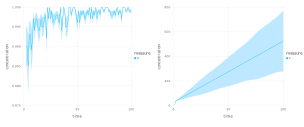

In [243]:
using Gadfly
#for x: only 2-100 plotted as first is very high copared to rest
xs = 2:1:100
xs_y = 1:1:100
deleteat!(plot_mean_x,1)
deleteat!(plot_var_x,1)

#print(size(plot_mean_x))
#print(size(xs))

#data for x
df_x = DataFrame(
    time=xs,
    concentration=plot_mean_x,
    ymin=plot_mean_x - plot_var_x/2,
    ymax=plot_mean_x + plot_var_x/2,
    messure="X"
)

#data for y
df_y = DataFrame(
    time=xs_y,
    concentration=plot_mean_y,
    ymin=plot_mean_y - plot_var_y/2,
    ymax=plot_mean_y + plot_var_y/2,
    messure="Y"
)
#plot thissss
set_default_plot_size(12inch, 5inch)
p = Gadfly.plot(df_x, x=:time, y=:concentration, ymin=:ymin, ymax=:ymax, color=:messure, Geom.line, Geom.ribbon)

i = Gadfly.plot(df_y, x=:time, y=:concentration, ymin=:ymin, ymax=:ymax, color=:messure, Geom.line, Geom.ribbon)
hstack(p, i)